In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spicy as st
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)

# Trabajo practico de Estadistica

### Alumno: José Ignacio Castro Martinez

### Padrón: 106957

## Cargando los datos

In [103]:
df = pd.read_csv('TPDatos.txt', header=None, delim_whitespace=True)
df = df.T
df.columns = ['almacenamiento', 'duracion']
df.head(5)

,almacenamiento,duracion
0,172.841048,19.930944
1,181.086954,29.391713
2,83.894914,21.667078
3,131.652344,21.586072
4,125.219752,24.454838


Ejercicio 1

"Antes de suponer una distribución conocida para cada variable, estimar las varianzas de forma insesgada (y por separado)"

Para buscar la varianza insesgada de ambos valores se procede a realizar el calculo mediante la siguiente formula $$ s^2 = \frac{1}{n-1} \cdot \sum_{i=1}^{n} (x_i - \bar{x}) 
^2$$  \ Para lo cual se calcula la media insesgeda, en este caso el promedio mediante el uso de las librerias disponibles en python. En un principio se busca la media de la siguiente forma:


In [90]:
media_almacenamiendo = df["almacenamiento"].mean()
media_duracion = df["duracion"].mean()

print("Esta es la media del almacenamiento en GB: ", media_almacenamiendo)
print("Esta es la media de la duracion en H: ", media_duracion)

Esta es la media del almacenamiento en GB:  127.58033271703853
Esta es la media de la duracion en H:  23.97210625986972


De manera que el calculo de la varianza se consigue facilmente usando los datos anteriormente calculados y la formula mencionada en el enunciado del ejercicio

In [91]:
var_almacenamiento = ((df["almacenamiento"] - media_almacenamiendo)**2).sum() / (len(df) - 1)
var_duracion = ((df["duracion"] - media_duracion)**2).sum() / (len(df) - 1)

print(f"La varianza del almacenamiento es: {var_almacenamiento} GB")
print(f"La varianza del la duracion es: {var_duracion} H")

La varianza del almacenamiento es: 1068.2440034213482 GB
La varianza del la duracion es: 15.566442716026044 H


Ejercicio 2

"Asumiendo que la distribucion de la capacidad de almacenamiento es normal, se desea hacer un test para rechazar que la media es $\mu_0^x$. Graficar el p-valor en función de $\mu_0^x$. Relacionar dicho grafico con el nivel de significacion. ¿Qué se puede decir del punto donde el p-valor alcanza el máximo?"

Se diseña el test planteando las siguientes hipotesis. 

$$H_0: \bar{x} = \mu_0^x \\
H_1: \bar{x} \neq \mu_0^x$$

Para las normales tenemos que:

$$Q(\bar{X}, \mu) = \frac{\sqrt{n}(\bar{X} - \mu_0)}{S} ~ t_{n-1}$$

Y mediante:

$$\delta(X) = 1\left\{\frac{\sqrt{n}(\bar{X} - \mu_0)}{s} < t_{n-1, \alpha/2} \right\} + 1\left\{\frac{\sqrt{n}(\bar{X} - \mu_0)}{s} > t_{n-1, 1 - \alpha/2}\right\}$$ 

Se podra rechazar el test si alguna de las dos condiciones se cumple y aceptarlo en el caso contrario

Donde $\mu_0$ seran valores de muestra generados por python cercanos a la media conseguida en la sección anterior

Para calcular el $p_{valor}$ se hace:

$$P_{valor} = 2\cdot(1 - P_{\mu_0^x = \mu_0 ^*}(\delta(x) = 1) )$$




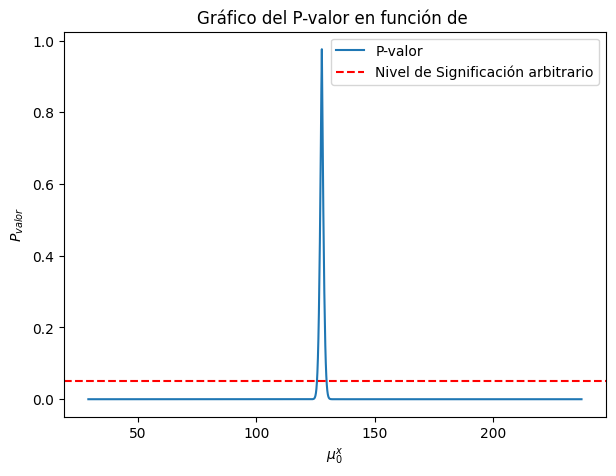

In [92]:
n = len(df["almacenamiento"])
std = np.sqrt(var_almacenamiento)
m_0_valores = np.linspace(min(df['almacenamiento']), max(df['almacenamiento']), 1000)
p_valores = []

for mu_0 in m_0_valores:
    estadistico_t = ((media_almacenamiendo - mu_0) * np.sqrt(n)) / std
    p_valor = 2 * (1 - stats.t.cdf(np.abs(estadistico_t), df=n-1))
    p_valores.append(p_valor)

plt.figure(figsize=(7, 5))
plt.plot(m_0_valores, p_valores, label='P-valor')
plt.xlabel('$\mu_0^x$')
plt.ylabel('$P_{valor}$')
plt.title('Gráfico del P-valor en función de ')
plt.axhline(0.05, color='red', linestyle='--', label='Nivel de Significación arbitrario')
plt.legend()
plt.show()

En el grafico anterior se muestran el $p_{valor}$ dado $\mu_0^x$, se agrega un nivel de significación arbitrario, en este caso $\alpha = 0.05$ en donde para todo $\mu$ tal que su $p_{valor}$ este sobre la recta punteada se cumple que no se puede rechazar la hipotesis 

Por otro lado, el $\mu_0 ^ x$ para el cual se alcanza el mayor $p_{valor}$ es el punto en el cual es más posible que la hipotesis nula sea cierta

## Ejercicio 3

"Graficar la función de distribución empirica de la capacidad de almacenamietno y compararla con la curva correspondiente a una normal cuya media corresonda al valor que maximiza el p-valor del inciso 2 y cuya varianza sea la estimada en el inciso 1" 

In [93]:
indice_max_p_valor = np.argmax(p_valores)
mu_optimo = m_0_valores[indice_max_p_valor]
print(f"El valor óptimo de mu_0 es: {mu_optimo}")

El valor óptimo de mu_0 es: 127.61165624956223


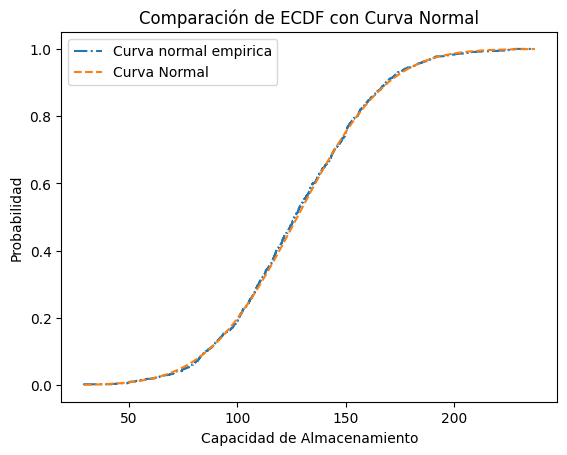

In [94]:
data_ordenada = np.sort(df["almacenamiento"])
y = np.arange(1, len(df["almacenamiento"]) + 1) / len(df["almacenamiento"])
x_normal = np.linspace(min(df["almacenamiento"]), max(df["almacenamiento"]), 100)
y_normal = st.stats.norm.cdf(x_normal, loc=mu_optimo, scale=np.sqrt(var_almacenamiento))
plt.step(data_ordenada, y, label='Curva normal empirica', linestyle='-.')
plt.plot(x_normal, y_normal, label='Curva Normal', linestyle='--')
plt.xlabel('Capacidad de Almacenamiento')
plt.ylabel('Probabilidad')
plt.title('Comparación de ECDF con Curva Normal')
plt.legend()
plt.show()

## Ejercicio 4

"Antes de asumir una distriibucion conocida para la duración de las baterias, se desea hacer un tesst para rechazar que la media es $\mu_0^y$. Graficar el p-valor asintotico en funcion de $\mu_0^y$. Relacionar dicho grafico con el concepto de nivel de significación asintotico. ¿Que se puede decir del punto donde el p-valor alcanza el maximo?"

Nuevamente se diseña el test similar al del item 2: 

$H_0: \bar{y} = \mu_0^y$

$H_1: \bar{y} \neq \mu_0^y$

Debido a que no se desea asumir ninguna distribución se realiza un test agnostico donde:

$$\frac{\sum_{i=1}^{n} Y_{i} - n\mu}{\sqrt{n\sigma^2}}  \stackrel{D}{\rightarrow} N(0,1)$$

Y obteniendo: 

$$\delta_n(\bar{Y}) = 1 \left\{ \sqrt{n} \left| \frac{\bar{y} - \mu_0^y}{S_y} \right| > K_{\alpha} \right\}$$




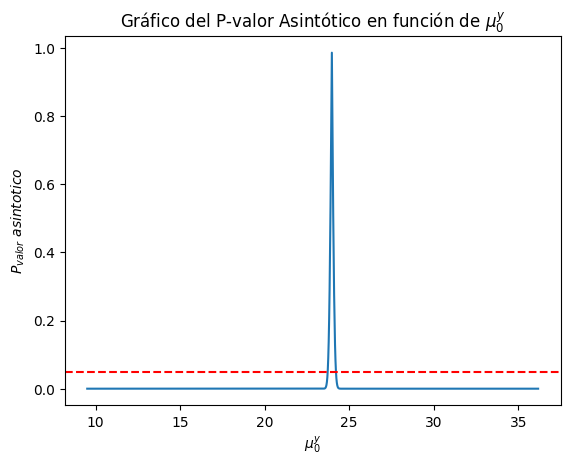

In [108]:
n = len(df["duracion"])
mu_0_y_valores = np.linspace(min(df['duracion']), max(df['duracion']), 1000)
p_values_asintoticos = [2 * (1 - st.stats.norm.cdf(np.abs((media_duracion - mu_0_y) / (np.sqrt(var_duracion) / np.sqrt(n))))) for mu_0_y in mu_0_y_valores]
mu_0_y_max_p_valor = mu_0_y_valores[np.argmax(p_values_asintoticos)]
plt.plot(mu_0_y_valores, p_values_asintoticos, label='P-valor Asintótico')
plt.axhline(0.05, color='red', linestyle='--', label='Nivel de Significación Asintótico arbitrario')
plt.xlabel('$\mu_0^y$')
plt.ylabel('$P_{valor} \ asintotico$')
plt.title('Gráfico del P-valor Asintótico en función de $\mu_0^y$')
plt.show()

La conclusión sobre el $P_{valor}$ de $\mu_0^y$ resulta ser la misma que la anterior obtenida en el item 2. Para $\mu_0^y$ donde se alcanza el $P_{valor}$ maximo, es el lugar donde es más posible aceptar la hipotesis nula

## Ejercicio 5

"Graficar el histograma de la duracion de las baterias y compararla con la curva correspondiente a la normal cuya media corresponda al valor que maximiza el p-valor asintotitco del inciso 4 y cuya varianza sea la estimada en el punto 1"

In [105]:
mu_0_y_max= mu_0_y_valores[np.argmax(p_values_asintoticos)]
print(f"El valor óptimo de mu_0 es: {mu_0_y_max}")

El valor óptimo de mu_0 es: 23.974220100152927


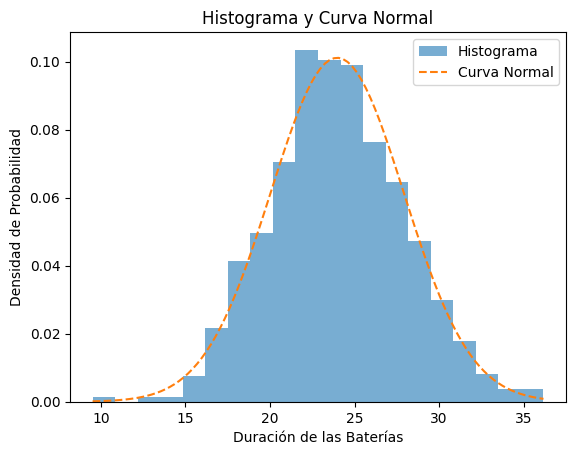

In [107]:
plt.hist(df["duracion"], bins=20, density=True, alpha=0.6, label='Histograma')

x_normal = np.linspace(min(df["duracion"]), max(df["duracion"]), 100)
y_normal = st.stats.norm.pdf(x_normal, loc=mu_0_y_max, scale=np.sqrt(var_duracion))
plt.plot(x_normal, y_normal, label='Curva Normal', linestyle='--')
plt.xlabel('Duración de las Baterías')
plt.ylabel('Densidad de Probabilidad')
plt.title('Histograma y Curva Normal')
plt.legend()
plt.show()

# Ejercicio 6

# Ejercicio 7

Text(0, 0.5, 'Duración de las Baterías')

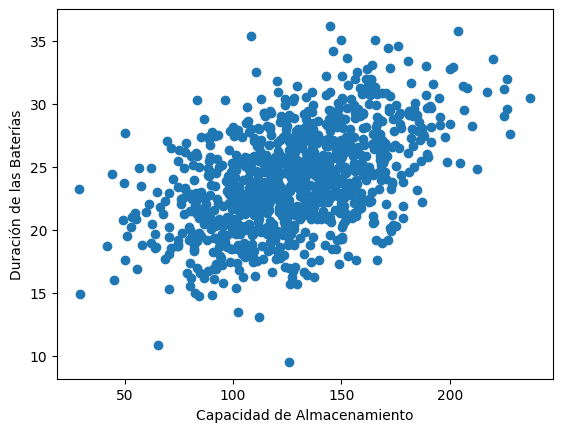

In [100]:
plt.scatter(df["almacenamiento"], df["duracion"])
plt.xlabel('Capacidad de Almacenamiento')
plt.ylabel('Duración de las Baterías')